# Residual Networks

Mettiamo a confronto le reti neurali tradizionali con quelle Residuali sul task di riconoscimento dei caratteri scritti a mano del dataset MNIST.

Creiamo dunque una rete dense normale ed una residuale per confrontare le rispettive performance.

In [5]:
# pip install tensorflow
# !pip install matplotlib
# !pip install numpy
# !pip install pandas
# !pip install sk-learn
# pip install--upgrade setuptools

  Using cached contourpy-1.2.1-cp312-cp312-win_amd64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.51.0-cp312-cp312-win_amd64.whl.metadata (162 kB)
  Using cached kiwisolver-1.4.5-cp312-cp312-win_amd64.whl.metadata (6.5 kB)
  Using cached pillow-10.3.0-cp312-cp312-win_amd64.whl.metadata (9.4 kB)
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
    --------------------------------------- 0.1/8.0 MB 1.1 MB/s eta 0:00:08
    --------------------------------------- 0.1/8.0 MB 1.1 MB/s eta 0:00:08
    --------------------------------------- 0.1/8.0 MB 1.1 MB/s eta 0:00:08
   - -------------------------------------- 0.3/8.0 MB 1.0 MB/s eta 0:00:08
   -- ------------------------------------- 0.4/8.0 MB 1.4 

ERROR: Could not find a version that satisfies the requirement sk-learn (from versions: none)
ERROR: No matching distribution found for sk-learn


In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Add, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt

In [14]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data(path="mnist.npz")

In [17]:
# preprocessing dei dataset

# normalizzazione
train_images = (train_images / 255)
test_images = (test_images / 255)

# appiattimento delle immagini da una matrice 28x28 ad un'array di 784 pixel
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))
train_images[0].shape

(784,)

In [16]:
# trasformazione degli output (label) in hot-encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [18]:
# creazione del modello Dense sequenziale

model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(784,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))

model.add(Dense(10, activation='softmax'))

# compilazione del modello

model.compile(optimizer=Adam(learning_rate=0.005), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

C:\Users\felip\OneDrive\Desktop\MLMC\MLenv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 16)                  │          12,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,906 (58.23 KB)

 Trainable params: 14,906 (58.23 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# addestramento 

history = model.fit(
    x = train_images,
    y = train_labels,
    epochs = 50,
    batch_size=512,
    validation_data = (test_images, test_labels),
    verbose=1
)

Epoch 1/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.1411 - loss: 2.2107 - val_accuracy: 0.3709 - val_loss: 1.5876
Epoch 2/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4006 - loss: 1.5172 - val_accuracy: 0.4878 - val_loss: 1.3290
Epoch 3/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5169 - loss: 1.2885 - val_accuracy: 0.5586 - val_loss: 1.2089
Epoch 4/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5806 - loss: 1.1608 - val_accuracy: 0.6286 - val_loss: 1.0903
Epoch 5/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6239 - loss: 1.0826 - val_accuracy: 0.6182 - val_loss: 1.0868
Epoch 6/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6658 - loss: 1.0010 - val_accuracy: 0.6791 - val_loss: 0.9707
Epoch 7/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6883 - loss: 0.9331 - val_accuracy: 0.6256 - val_loss: 1.0815
Epoch 8/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7076 - loss: 0.9020 - val_accuracy: 0.

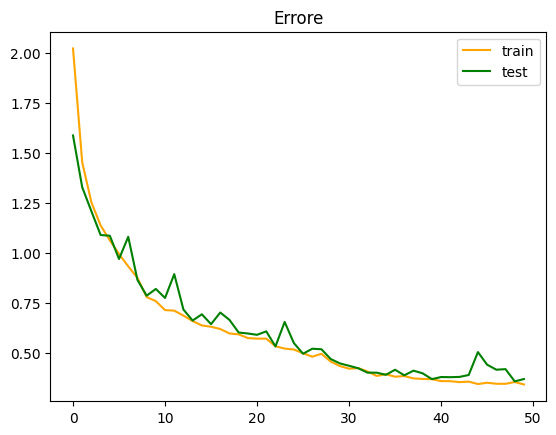

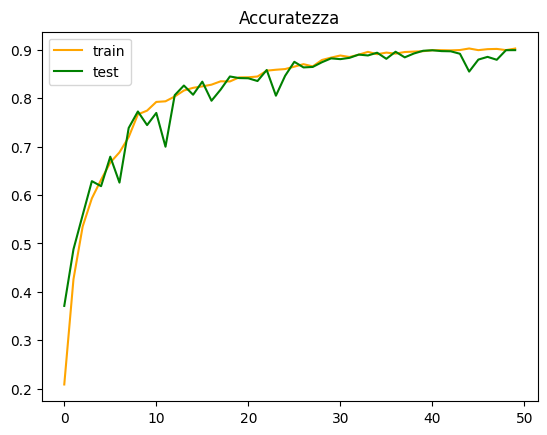

In [20]:
# disegnamo i grafici 
# errore del modello
plt.plot(history.history['loss'], color='orange', label='train')
plt.plot(history.history['val_loss'], color='green', label='test')
plt.title('Errore')
plt.legend()
plt.show()

# accuratezza del modello
plt.plot(history.history['accuracy'], color='orange', label='train')
plt.plot(history.history['val_accuracy'], color='green', label='test')
plt.title('Accuratezza')
plt.legend()
plt.show()

In [29]:
# valutazione della rete

evaluations = model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8784 - loss: 0.4306


In [27]:

for i in range(len(model.metrics_names)):
    print(f'{model.metrics_names[i]} -> {evaluations[i]}')

loss -> 0.3711121678352356
compile_metrics -> 0.8992000222206116


# Facciamo lo stesso ma con una Residual Network

In questo caso utilizziamo le Functional API di Keras. Attraverso queste API possiamo costruire le reti in maniera più flessibile. 

Ogni oggetto che andiamo ad aggiungere al nostro modello è un'oggetto callable (chiamabile) cioè un oggetto che tramite le chiamate API possiamo generalizzare.

Significa che possiamo creare un generico modello ad es. Dense(units=16, activation='relu') ed utilizzare questo stesso modello come una nuova funzione passando in input un certo tensore 
Dense(units=16, activation='relu')(input).

Se creiamo il nostro modello generico (che utilizzaimo per i layers) definenedolo: 
dense_16_relu = Dense(units=16, activation='relu')

poi quando vogliamo crearne un'altro uguale ma che prende un differente input possiamo fare:

dense_16_relu(input)

I livelli di Residual Block prendono l'input dal livello precedente e poi il loro output segue due strade diverse, una segue la strada feedforward normale l'altra skippa alcuni livelli con i pesi per poi entrare come input in una funzione di attivazione assieme all'output ottenuto successivamnete al passaggio in alcuni livelli con i pesi.

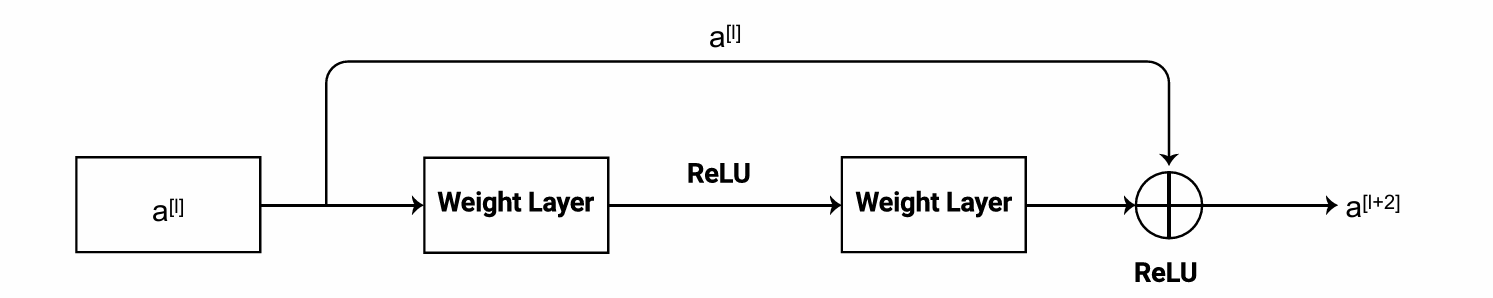

In [33]:
from IPython.display import Image
Image('Week 3-4-5_CNN/Esercitazione Residual Networks/Resi.png')

In [43]:
train_images.shape[1]

784

In [52]:
input = Input(shape=(train_images.shape[1],))

# dense_16_relu = Dense(units=16, activation='relu')

dense = Dense(units=16, activation='relu')(input) # l'uscita di questo layer andrà in input anche al residual block (livello L)
dense2 = Dense(units=16, activation='relu')(dense) #weighted layer
dense3 = Dense(units=16)(dense2) #weighted layer ma senza funzione di attivazione (livello di cui l'uscita andrà in input al Residual Block) (livello L+2)

# creiamo la skip connection che poi prende in input la somma dei due rami in una funzione di attivazione
res1 = Add()([dense, dense3])
res1 = Activation('relu')(res1)

# l'uscita del blocco residuale lo diamo in input ad livello weighted normale
dense4 = Dense(units=16, activation='relu')(res1) # l'uscita andrà in input al secondo residual block
dense5 = Dense(units=16, activation='relu')(dense4)
dense6 = Dense(units=16) # weighted layer ma senza funzione di attivazione con lo stesso scopo di prima

res2 = Add()([dense4, dense6])
res2 = Activation('relu')(res2)

# ancora un blocco
dense7 = Dense(units=16, activation='relu')(res2)
dense8 = Dense(units=16, activation='relu')(dense7)
dense9 = Dense(units=16)

res3 = Add()([dense7, dense9])
res3 = Activation('relu')(res3)

# livello di output 
output = Dense(units=10, activation='softmax')(res3)

# creazione del modello
model = tf.keras.models.Model(
    inputs=[input],
    outputs=[output],
    name='ResNet'
)

model.compile(
    optimizer=Adam(learning_rate=0.005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


model.summary()

ValueError: Only input tensors may be passed as positional arguments. The following argument value should be passed as a keyword argument: <Dense name=dense_62, built=False> (of type <class 'keras.src.layers.core.dense.Dense'>)

In [51]:
input = Input(shape=(train_images.shape[1],))

'''
dense_16_relu = Dense(units=16, activation='relu')
'''


dense = dense_16_relu(input)
dense2 = Dense(units=16, activation='relu')(dense)
dense3 = Dense(units=16)(dense2)

res1 = Add()([dense, dense3])
res1 = Activation('relu')(res1)

dense4 = Dense(units=16, activation='relu')(res1)
dense5 = Dense(units=16, activation='relu')(dense4)
dense6 = Dense(units=16)(dense5)

res2 = Add()([dense4, dense6])
res2 = Activation('relu')(res2)

dense7 = Dense(units=16, activation='relu')(res2)
dense8 = Dense(units=16, activation='relu')(dense7)
dense9 = Dense(units=16)(dense8)

res3 = Add()([dense7, dense9])
res3 = Activation('relu')(res3)

output = Dense(units=10, activation='softmax')(res3)

model = tf.keras.models.Model(
    inputs=[input],
    outputs=[output],
    name='ResNet'
)
# compilazione del modello

model.compile(
  optimizer=Adam(learning_rate=0.005),
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

model.summary()

Model: "ResNet"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_14 (InputLayer)   │ (None, 784)               │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_23 (Dense)              │ (None, 16)                │          12,560 │ input_layer_14[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_48 (Dense)              │ (None, 16)                │             272 │ dense_23[3][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_49 (Dense)              │ (None, 16)                │             272 │ dense_48[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ add_8 (Add)                   │ (None, 16)                │               0 │ dense_23[3][0],            │
│                               │                           │                 │ dense_49[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_7 (Activation)     │ (None, 16)                │               0 │ add_8[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_50 (Dense)              │ (None, 16)                │             272 │ activation_7[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_51 (Dense)              │ (None, 16)                │             272 │ dense_50[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_52 (Dense)              │ (None, 16)                │             272 │ dense_51[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ add_9 (Add)                   │ (None, 16)                │               0 │ dense_50[0][0],            │
│                               │                           │                 │ dense_52[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_8 (Activation)     │ (None, 16)                │               0 │ add_9[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_53 (Dense)              │ (None, 16)                │             272 │ activation_8[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_54 (Dense)              │ (None, 16)                │             272 │ dense_53[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_55 (Dense)              │ (None, 16)                │             272 │ dense_54[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ add_10 (Add)                  │ (None, 16)                │               0 │ dense_53[0][0],            │
│                               │                           │                 │ dense_55[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_9 (Activation)     │ (None, 16)                │               

 Total params: 14,906 (58.23 KB)

 Trainable params: 14,906 (58.23 KB)

 Non-trainable params: 0 (0.00 B)

Vediamo che anche questa rete ha 14.906 parametri poichè ha anche questa 10 layers (8 hidden + input e output) e perchè le skip connection non aggiungono parametri sono solo il risultato di operazioni lineari che entrano nella funzione di attivazione a due input.

In [53]:
history_res = model.fit(
    x = train_images,
    y = train_labels,
    epochs=50,
    batch_size=512,
    validation_data=(test_images, test_labels),
    verbose=2
)

Epoch 1/50
118/118 - 4s - 33ms/step - accuracy: 0.3730 - loss: 1.6805 - val_accuracy: 0.5705 - val_loss: 1.1682
Epoch 2/50
118/118 - 0s - 4ms/step - accuracy: 0.6461 - loss: 1.0245 - val_accuracy: 0.6683 - val_loss: 0.9864
Epoch 3/50
118/118 - 1s - 5ms/step - accuracy: 0.7220 - loss: 0.8564 - val_accuracy: 0.7349 - val_loss: 0.8186
Epoch 4/50
118/118 - 0s - 4ms/step - accuracy: 0.7655 - loss: 0.7494 - val_accuracy: 0.7803 - val_loss: 0.7037
Epoch 5/50
118/118 - 1s - 6ms/step - accuracy: 0.7998 - loss: 0.6499 - val_accuracy: 0.7881 - val_loss: 0.6800
Epoch 6/50
118/118 - 0s - 4ms/step - accuracy: 0.8242 - loss: 0.5843 - val_accuracy: 0.8314 - val_loss: 0.5833
Epoch 7/50
118/118 - 1s - 4ms/step - accuracy: 0.8505 - loss: 0.5109 - val_accuracy: 0.8686 - val_loss: 0.4622
Epoch 8/50
118/118 - 0s - 4ms/step - accuracy: 0.8731 - loss: 0.4439 - val_accuracy: 0.8833 - val_loss: 0.4255
Epoch 9/50
118/118 - 0s - 4ms/step - accuracy: 0.8827 - loss: 0.4111 - val_accuracy: 0.8908 - val_loss: 0.3975


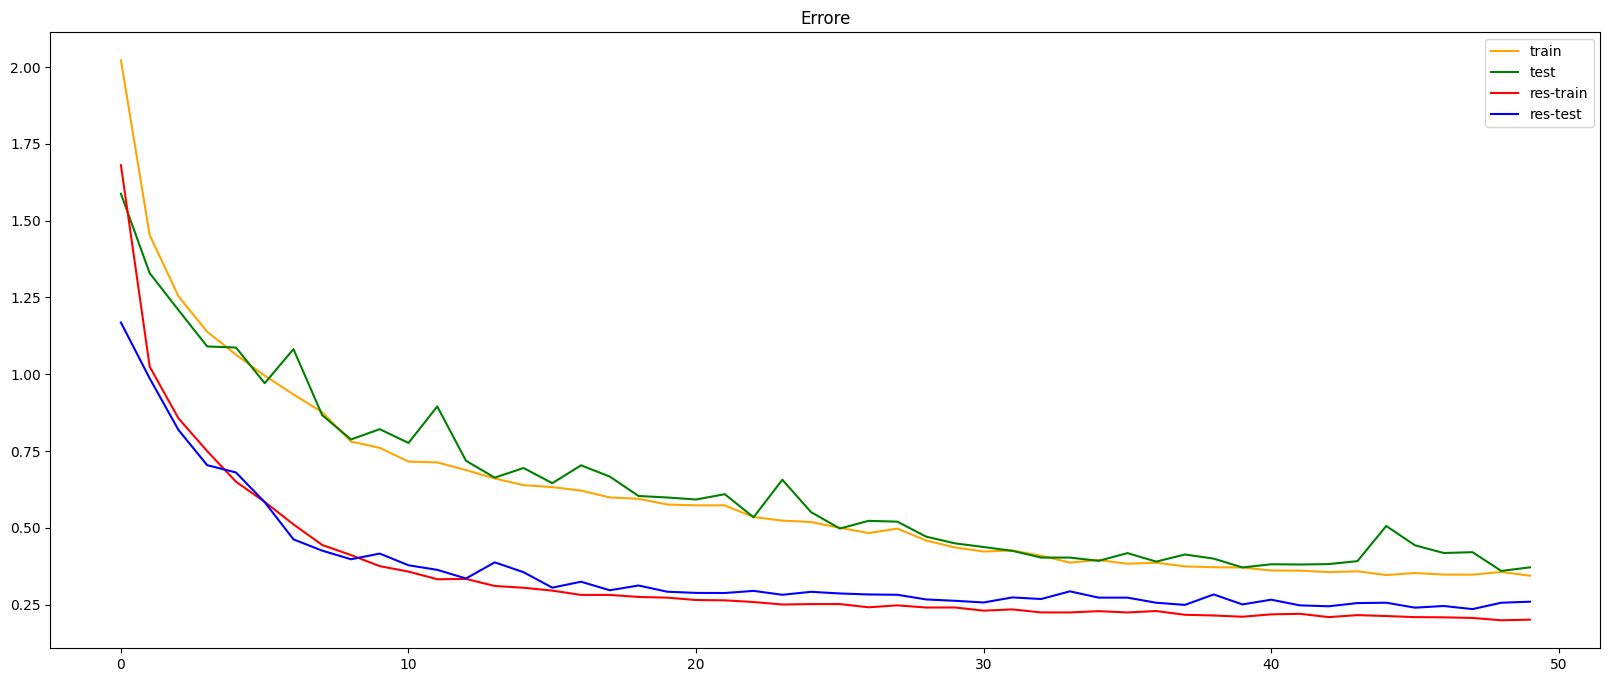

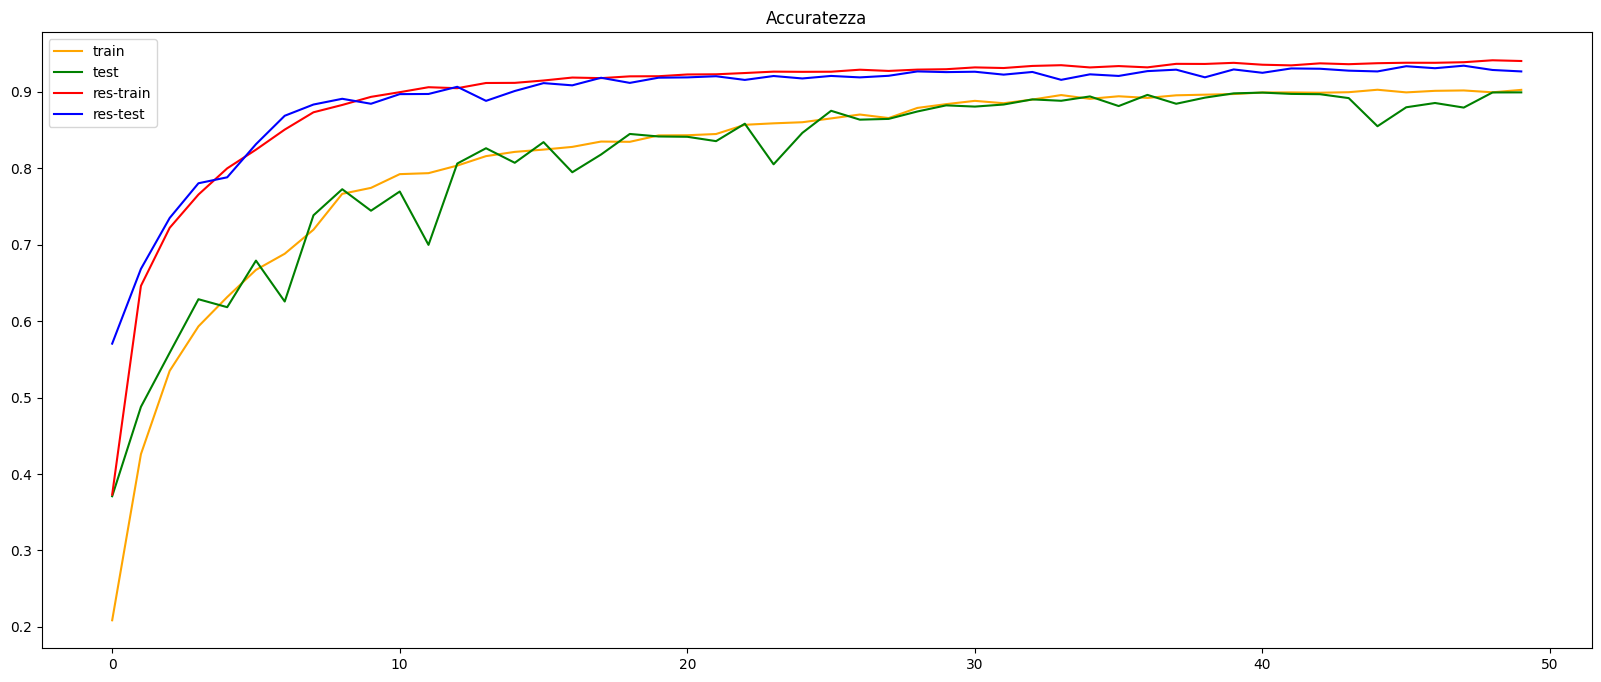

In [56]:
# grafici per il confronto delle due reti

#loss
plt.figure(figsize=(20, 8))
plt.plot(history.history['loss'], color='orange', label='train')
plt.plot(history.history['val_loss'], color='green', label='test')
plt.plot(history_res.history['loss'], color='red', label='res-train')
plt.plot(history_res.history['val_loss'], color='blue', label='res-test')
plt.title('Errore')
plt.legend()
plt.show()

# accuracy
plt.figure(figsize=(20, 8))
plt.plot(history.history['accuracy'], color='orange', label='train')
plt.plot(history.history['val_accuracy'], color='green', label='test')
plt.plot(history_res.history['accuracy'], color='red', label='res-train')
plt.plot(history_res.history['val_accuracy'], color='blue', label='res-test')
plt.title('Accuratezza')
plt.legend()
plt.show()

In [57]:
evaluations_res = model.evaluate(test_images, test_labels)

for i in range(len(evaluations_res)):
    print('{} -> {}'.format(model.metrics_names[i], evaluations_res[i]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9186 - loss: 0.2846
loss -> 0.2592809498310089
compile_metrics -> 0.9265999794006348


Possiamo vedere che a parità di parametri e di layers la rete con i Blocchi Residuali (mappatura residua) ha delle performance migliori delle rete normale.